In [8]:
%matplotlib inline

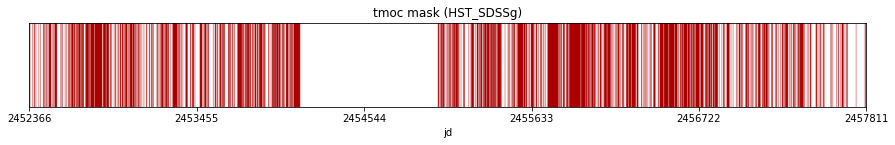

In [9]:
from mocpy import TimeMoc

time_moc = TimeMoc.from_file('notebooks/demo-data/TMOC/HST_SDSSg/TMoc.fits')
time_moc.plot(title='tmoc mask (HST_SDSSg)')

In [10]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('II/285')[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
 T ANT 978 2444298.4760  9.520  --  0.853  0.463    --  0.903
 T ANT 978 2444299.4940  9.720  --  0.927  0.484    --  0.953
 T ANT 978 2444300.4070  9.575  --  0.809  0.441    --  0.872
 T ANT 978 2444301.4180  8.881  --  0.499  0.309    --  0.608
 T ANT 978 2444302.4110  9.139  --  0.661  0.392    --  0.754
 T ANT 976 2451619.3105  9.738  --  0.910     --    --  0.959
 T ANT 976 2451619.3828     --  --     --     --    --  0.974
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445204.2187 14.102  --  1.372     --    --     --
NN VUL 950 2445205.2265 14.075  --  1.423     --    --     --
NN VUL 9

CPU times: user 1.46 s, sys: 4 ms, total: 1.47 s
Wall time: 1.47 s


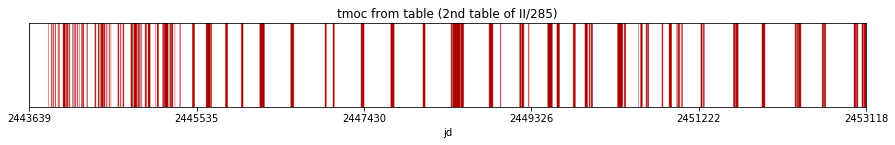

In [11]:
%time table_moc = TimeMoc.from_table(table, t_column='JD', format='jd')
table_moc.plot(title='tmoc from table (2nd table of II/285)')

In [12]:
# filtering the table through the tmoc loaded from file (e.g. time_moc)
filtered_table = time_moc.filter_table(table=table,
                                  t_column='JD',
                                  format='jd',
                                  keep_inside=True)
print(filtered_table)

 Name  Ref      JD       Vmag  U-B  B-V   V-Rc Rc-Ic  V-Ic 
                d        mag   mag  mag   mag   mag   mag  
------ --- ------------ ------ --- ------ ---- ----- ------
 U CAR 969 2452660.3950  6.208  --     --   --    --  1.276
 V CAR 969 2452650.5189  7.297  --     --   --    --  0.933
 V CAR 968 2452996.4970  7.202  --     --   --    --  0.856
UX CAR 969 2452660.4561  8.429  --     --   --    --  0.818
VY CAR 969 2452660.3934  7.952  --     --   --    --  1.357
WZ CAR 969 2452660.3939  8.686  --     --   --    --  1.039
XX CAR 969 2452660.3941  9.358  --     --   --    --  1.324
XZ CAR 969 2452660.3952  8.349  --     --   --    --  1.313
YZ CAR 969 2452660.4555  8.639  --     --   --    --  1.285
CR CAR 969 2452660.4582 11.582  --     --   --    --  1.522
   ... ...          ...    ... ...    ...  ...   ...    ...
RY VEL 969 2452660.4554  8.241  --     --   --    --  1.555
RZ VEL 969 2452650.5193  7.617  --     --   --    --  1.381
SV VEL 969 2452660.3939  7.917  --     -

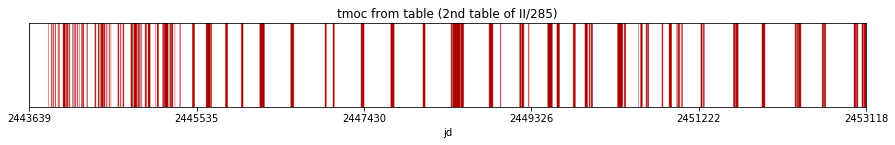

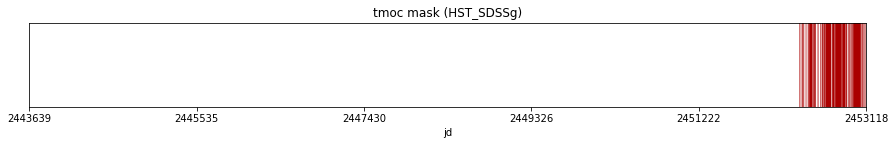

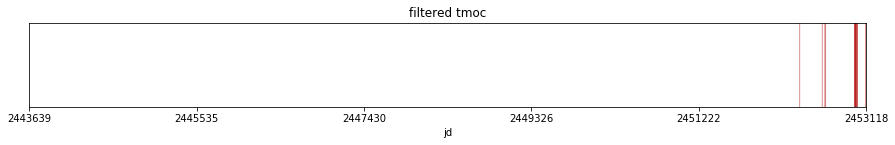

In [13]:
# Creation of a time moc from the filtered table. We can compare it to the original time moc created from the table
filtered_moc = TimeMoc.from_table(filtered_table, t_column='JD', format='jd')

# Plot the table tmoc
table_moc.plot(title='tmoc from table (2nd table of II/285)')
# Plot the tmoc mask with the window of the table moc
time_moc.plot(title='tmoc mask (HST_SDSSg)', view=(table_moc.min_time, table_moc.max_time))
# Plot the filtered moc
filtered_moc.plot(title='filtered tmoc', view=(table_moc.min_time, table_moc.max_time))

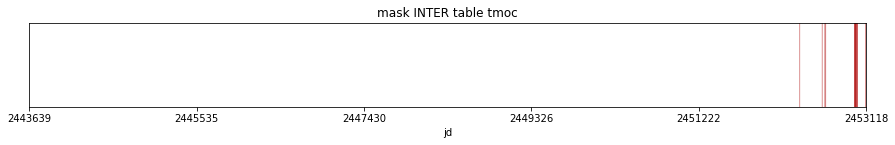

In [14]:
intersect_tmoc = table_moc.intersection(time_moc)
intersect_tmoc.plot(title='mask INTER table tmoc', view=(table_moc.min_time, table_moc.max_time))

In [15]:
assert intersect_tmoc == filtered_moc